In [28]:
# importing packages
import glob
import torch
import numpy as np
import scipy.io as sci
import matplotlib.pyplot as plt

## Configuring and importing the data

In [121]:
# setting paths for data
data_names = "/Users/julianasilvadedeus/Library/CloudStorage/OneDrive-OIST/PhD/second_year/term2/Intro_ML/Project/raw_data/lfp/"
sorted_folder = "/Users/julianasilvadedeus/Library/CloudStorage/OneDrive-OIST/PhD/second_year/term2/Intro_ML/Project/raw_data/sorted/"

# getting name of files
dado = glob.glob(data_names + '*.mat')
classif = glob.glob(sorted_folder + '*.mat')
dado = np.sort(dado) # put two arrays into the same order to match files
classif = np.sort(classif)

# read in sorted data and electric data
signalInfo = sci.loadmat(dado[8])
sortInfo = sci.loadmat(classif[8])    

## Making a CS array for easy plotting and data manipulation

In [122]:
# reshapping some data
lfp = (np.array(signalInfo['LFP'])).flatten()
CS_offset = (np.array(sortInfo['CS_offset'])).flatten()
CS_onset = (np.array(sortInfo['CS_onset'])).flatten()

# setting necessary values
preCS = 100 # value before the onset
postCS = 150
dur = CS_offset - CS_onset # duration for all CSs
validDur = np.max(dur) # max duration considered to build a matrix
byCSData = np.zeros((dur.shape[0], (validDur + (preCS + postCS))))

# make the basic CS matrix
for cs in range(len(dur)):
    onset = CS_onset[cs]
    pre = onset - preCS
    post = onset + (validDur + postCS)
    currTrial = lfp[pre:post]
    byCSData[cs, :currTrial.shape[0]] = currTrial  

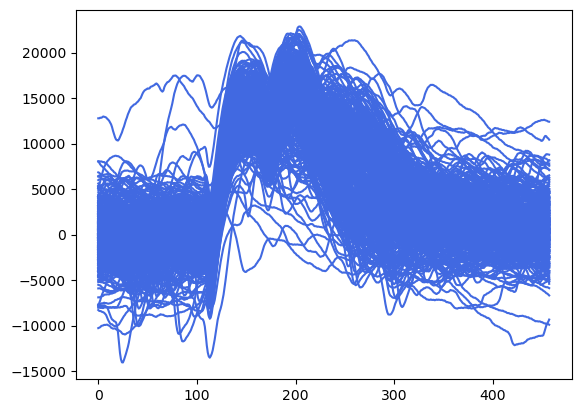

In [123]:
# plotting the CSs
_, cs = plt.subplots(nrows = 1, ncols = 1)
cs.plot(byCSData.T, color = 'royalblue');

In [26]:
byCSData.shape

(351, 250)

In [5]:
# cleaning function
def str_replace(compStr, path, extension):
    frase = compStr
    noPath = frase.replace(path, "")
    noext = noPath.replace(extension, "")
    return noExt


['/Users/julianasilvadedeus/Library/CloudStorage/OneDrive-OIST/PhD/second_year/term2/Intro_ML/Project/raw_data/lfp/emil180301ch1s1e1.mat',
 '/Users/julianasilvadedeus/Library/CloudStorage/OneDrive-OIST/PhD/second_year/term2/Intro_ML/Project/raw_data/lfp/ike130829ch2s1e1.mat',
 '/Users/julianasilvadedeus/Library/CloudStorage/OneDrive-OIST/PhD/second_year/term2/Intro_ML/Project/raw_data/lfp/emil180801ch2s2e1.mat',
 '/Users/julianasilvadedeus/Library/CloudStorage/OneDrive-OIST/PhD/second_year/term2/Intro_ML/Project/raw_data/lfp/emil181101ch2s1e1.mat',
 '/Users/julianasilvadedeus/Library/CloudStorage/OneDrive-OIST/PhD/second_year/term2/Intro_ML/Project/raw_data/lfp/ike130911ch2s1e1.mat',
 '/Users/julianasilvadedeus/Library/CloudStorage/OneDrive-OIST/PhD/second_year/term2/Intro_ML/Project/raw_data/lfp/ike130924ch1s1e1.mat',
 '/Users/julianasilvadedeus/Library/CloudStorage/OneDrive-OIST/PhD/second_year/term2/Intro_ML/Project/raw_data/lfp/ike130711ch1s1e1.mat',
 '/Users/julianasilvadedeus/Lib